In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go 
from scipy.stats import t
from scipy import stats

In [134]:
data = pd.read_csv('hotel_bookings.csv')

In [135]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [136]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [137]:
df=data.copy()
df['children'].fillna(0,inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)
df.drop(['company'],axis=1,inplace=True)
df['agent'].fillna(0,inplace=True)

In [138]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [139]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

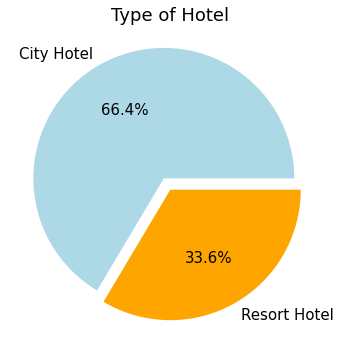

In [195]:
lab = 'City Hotel','Resort Hotel'
plt.pie(df['hotel'].value_counts(), labels = lab, autopct='%1.1f%%',colors=['lightblue','orange'],explode=(0.1,0))
plt.title('Type of Hotel')
plt.show()

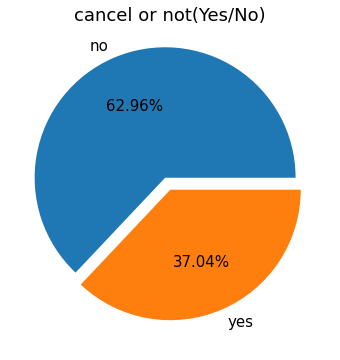

In [196]:
df['is_canceled']=df['is_canceled'].astype('str').replace(['0','1'],['no','yes'])
plt.rcParams['figure.figsize']=6,6
plt.pie(df['is_canceled'].value_counts(),labels=df['is_canceled'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('cancel or not(Yes/No)')
plt.show()

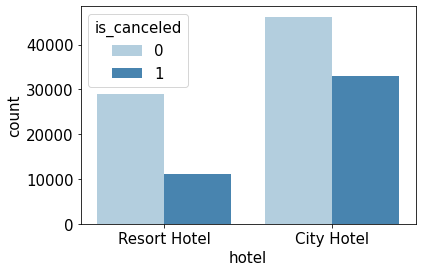

In [190]:
sns.countplot(data=df, x='hotel', palette='Blues', hue='is_canceled')

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Cancellation rate')

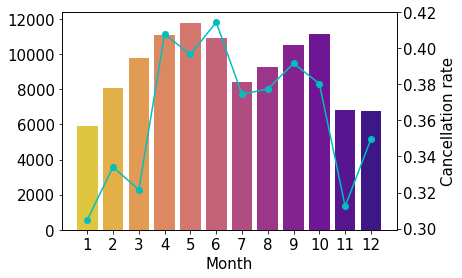

In [142]:
ordered_months = [
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"
]
fig,ax1=plt.subplots()
ax2=ax1.twinx()
monthly=df.groupby('arrival_date_month').size()
monthly/2
monthly.loc[['July', 'August']] = monthly.loc[['July', 'August']] * 2 / 3
sns.barplot(list(range(1, 13)), monthly[ordered_months], ax=ax1,palette="plasma_r")
ax2.plot(
    range(12), df.groupby('arrival_date_month')['is_canceled'].mean()[ordered_months].values,'co-')
ax1.set_xlabel('Month')
ax2.set_ylabel('Cancellation rate')


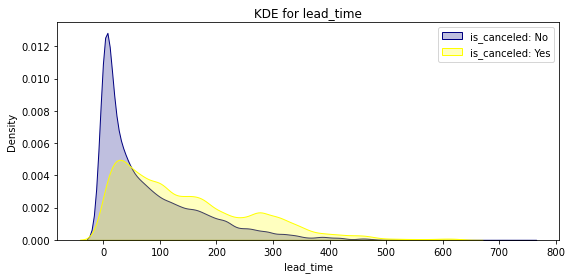

In [143]:
def kdeplot(feature,xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(df[df['is_canceled'] == 0][feature].dropna(), color= 'navy', label= 'is_canceled: No', shade='True')
    ax1 = sns.kdeplot(df[df['is_canceled'] == 1][feature].dropna(), color= 'yellow', label= 'is_canceled: Yes',shade='True')
    plt.xlabel(xlabel)
    
    plt.rcParams.update({'font.size': 15})
    plt.legend(fontsize=10)
 
%matplotlib inline
kdeplot('lead_time','lead_time')

In [144]:
resort_h = df[df["hotel"] == "Resort Hotel"]
city_h = df[df["hotel"] == "City Hotel"]

In [145]:
canceled = df[df["is_canceled"].isin(["1"])]
uncanceled = df[df["is_canceled"].isin(["0"])]

In [146]:
def get_country(df, n):
    country_data = df.groupby(['country']).size().reset_index(name='counts')
    country_data = country_data.sort_values('counts')
    return country_data.tail(n)

In [147]:
country_resort = get_country(resort_h, 20)

In [148]:
country_resort = get_country(resort_h, 10)
fig1 = px.bar(country_resort, x='country', y='counts',title='Resort Hotel')
fig1.show()

In [149]:
country_city = get_country(city_h, 10)
fig2 = px.bar(country_city, x='country', y='counts',title='City Hotel')
fig2.show()

Text(0.5, 1.0, 'City Hotel Market Segment')

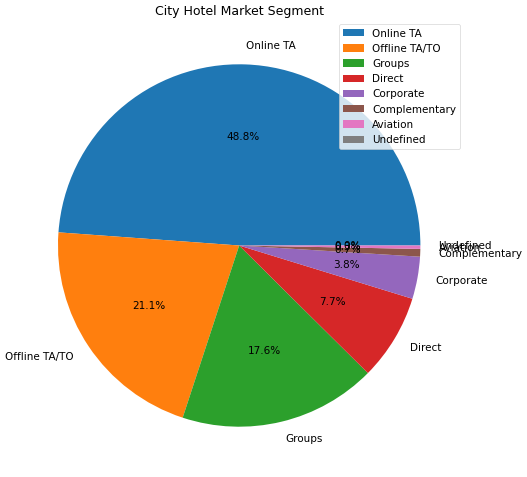

In [198]:
city_segment=city_h.market_segment.value_counts()
plt.figure(figsize=(30,12),dpi=50)
plt.pie(city_segment,labels=city_segment.index,autopct='%1.1f%%')
plt.legend()
plt.title('City Hotel Market Segment')

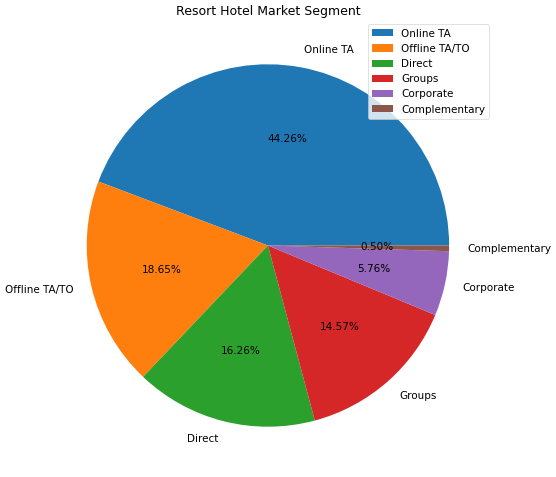

In [188]:
resort_segment=resort_h.market_segment.value_counts()
plt.figure(figsize=(30,12),dpi=50)
plt.pie(resort_segment,labels=resort_segment.index,autopct='%.2f%%')
plt.title('Resort Hotel Market Segment')
plt.legend()

Text(0, 0.5, 'Cancellation rate')

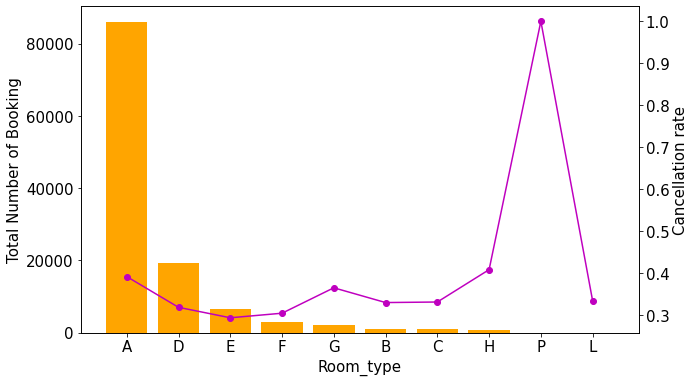

In [150]:
reserved_room_type = list(
    df.groupby('reserved_room_type').size().sort_values(ascending=False).head(20).index)
df[df.reserved_room_type.isin(reserved_room_type)].shape[0] / df.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(len(reserved_room_type)),reserved_room_type)
ax1.bar(
    range(len(reserved_room_type)), data[data.reserved_room_type.isin(reserved_room_type)].groupby('reserved_room_type').size().sort_values(ascending=False),color='orange')
ax1.set_xlabel('Room_type')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(len(reserved_room_type)),
    data[data.reserved_room_type.isin(reserved_room_type)].groupby('reserved_room_type')['is_canceled'].mean().loc[reserved_room_type], 'mo-')
ax2.set_ylabel('Cancellation rate')

Text(0, 0.5, 'Cancellation rate')

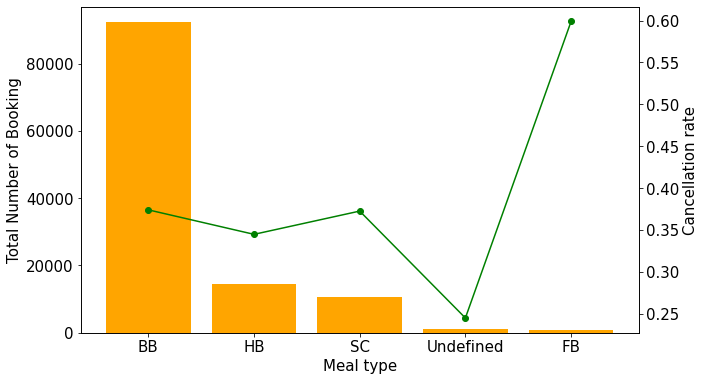

In [151]:
meal = list(
    df.groupby('meal').size().sort_values(ascending=False).head(20).index)
df[df.meal.isin(meal)].shape[0] / df.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(len(meal)),meal)
ax1.bar(
    range(len(meal)), data[data.meal.isin(meal)].groupby('meal').size().sort_values(ascending=False),color='orange')
ax1.set_xlabel('Meal type')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(len(meal)),
    data[data.meal.isin(meal)].groupby('meal')['is_canceled'].mean().loc[meal], 'go-')
ax2.set_ylabel('Cancellation rate')

Text(0, 0.5, 'Cancellation rate')

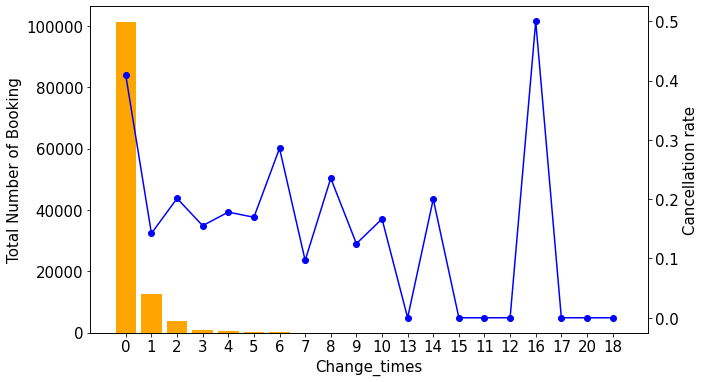

In [199]:
book_changes = list(
    df.groupby('booking_changes').size().sort_values(ascending=False).head(20).index)
df[df.booking_changes.isin(book_changes)].shape[0] / df.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(len(book_changes)),book_changes)
ax1.bar(
    range(len(book_changes)), data[data.booking_changes.isin(book_changes)].groupby('booking_changes').size().sort_values(ascending=False),color='orange')
ax1.set_xlabel('Change_times')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(len(book_changes)),
    data[data.booking_changes.isin(book_changes)].groupby('booking_changes')['is_canceled'].mean().loc[book_changes], 'bo-')
ax2.set_ylabel('Cancellation rate')

<ipython-input-205-874df51049b4>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-205-874df51049b4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



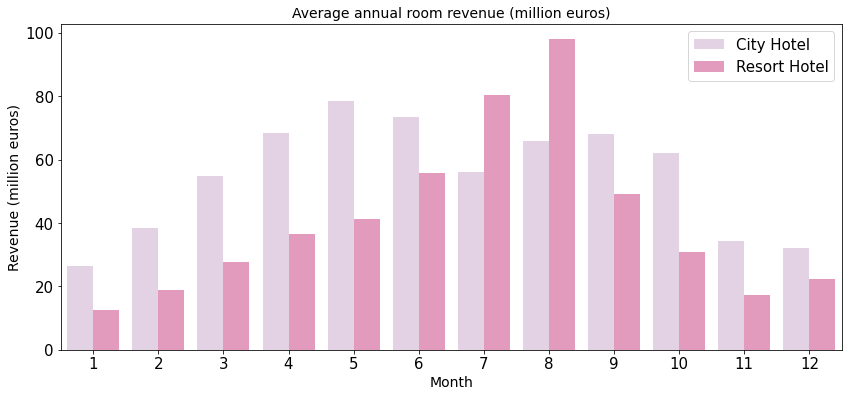

In [205]:
uncanceled['total_nights']=uncanceled['stays_in_weekend_nights']+uncanceled['stays_in_week_nights']
uncanceled['total_price']=uncanceled['total_nights']*uncanceled['adr']
revenue_data=uncanceled.groupby(['arrival_date_month','hotel'],as_index=False).agg({'total_price':'sum'})

revenue_data['arrival_date_month']=revenue_data['arrival_date_month'].map({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,
                                                                 'July':7,'August':8,'September':9,'October':10,'November':11,'December':12})
revenue_data=revenue_data.sort_values('arrival_date_month')

revenue_data.loc[(revenue_data["arrival_date_month"] == 7) | (revenue_data["arrival_date_month"] == 8),"total_price"] /= 30000
revenue_data.loc[~((revenue_data["arrival_date_month"] == 7) | (revenue_data["arrival_date_month"] == 8)),"total_price"] /= 20000

plt.figure(figsize=(14, 6))
sns.barplot(data=revenue_data,x='arrival_date_month',y='total_price',hue='hotel',palette = 'PuRd',alpha=0.5)
plt.title('Average annual room revenue (million euros)',fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenue (million euros)',fontsize=14)
plt.legend()
plt.show()

<ipython-input-206-b4d99823b7fb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



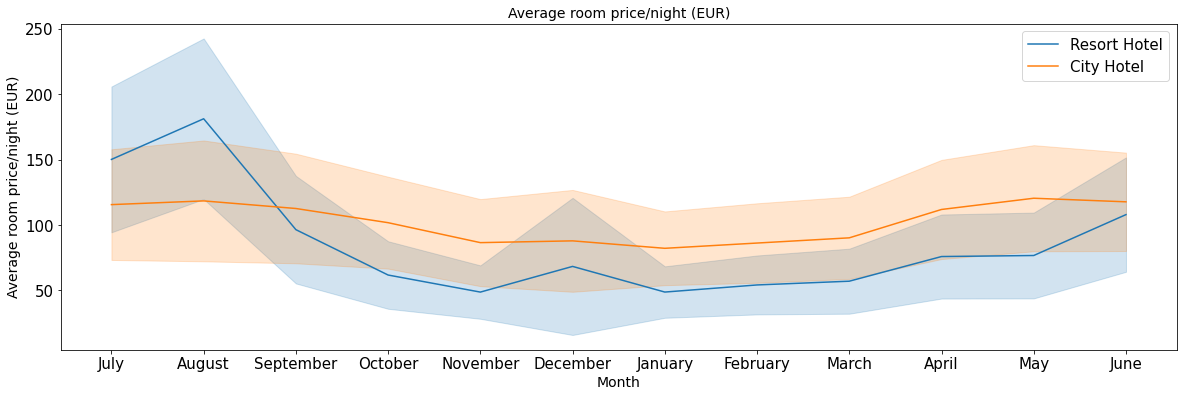

In [206]:
adr_data=uncanceled[['hotel', 'arrival_date_month', 'adr']]

adr_data['arrival_date_month']=adr_data['arrival_date_month']
adr_data=adr_data.sort_values('arrival_date_month')

plt.figure(figsize=(20, 6))
sns.lineplot(x = 'arrival_date_month', y='adr', hue='hotel', data=uncanceled,ci='sd')
plt.title('Average room price/night (EUR)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average room price/night (EUR)', fontsize=14)
plt.legend()
plt.show()